In [8]:
import pandas as pd
import MeCab
import numpy as np
df = pd.read_excel('data/비교.xlsx')

import matplotlib.pyplot as plt
plt.rc('font',family='AppleGothic')
import seaborn as sns

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')


In [2]:
df.shape

(2409, 16)

In [3]:
df.head(1)

,site,hotel,score,review,date,star,length,review_spell_check,helpful,attitude,위치,시설,인테리어,청결,친절,방음
0,아고다,나인트리 프리미어 명동2,10.0,뷰 좋고 위치 좋고 깨끗하고 최고 입니다,NaN,NaN,22,뷰 좋고 위치 좋고 깨끗하고 최고입니다,1,2,1,0,0,0,0,0


In [5]:
stop_words = ['나','여기','무엇','그것','가','긋','가본','제','저','저희','그거','브','우리','그','큐티','쏘','슈','어디','뭐','자기','놀자','이곳','임','요방','너','그곳','거기','니티','노','이쪽','저기','호텔','곳','점','앞','시','원분','스로','도','대','플','기','그제','넥','딩','놀']
#stop_words = []
len(stop_words)
def getNVM_lemma(text):
    tokenizer = MeCab.Tagger()
    parsed = tokenizer.parse(text)
    #print(parsed)
    word_tag = [w for w in parsed.split("\n")] 
    pos = []
    tags = ["NNG", "NNP","VV","VA","VCP",'VCN','XR']
   
    for word_ in word_tag[:-2]:
        word = word_.split('\t') #['아버지', 'NNG,*,F,아버지,*,*,*,*']
        tag = word[1].split(",")  #['EC', '*', 'F', '는다', '*', '*', '*', '*']
        if('+' in tag[0]): #단어가 여러 형태소로 구성된 경우
            if ('VV' in tag[0] or 'VA' in tag[0] or 'VX' in tag[0]):
                t = tag[-1].split('/')[0]
                if t not in stop_words:
                    pos.append(t)
        elif ((tag[0] in tags) and (word[0] not in stop_words)):
            pos.append(word[0])
    return pos

In [6]:
r_all = ''
for i in range(df.shape[0]):
    r_all = r_all + df['review_spell_check'][i]

In [7]:
text = getNVM_lemma(r_all)
from collections import Counter
c = Counter(text)
print(c)

Counter({'좋': 1781, '하': 475, '있': 473, '친절': 368, '이': 367, '위치': 322, '깨끗': 322, '깔끔': 288, '직원': 264, '만족': 238, '이용': 231, '되': 219, '방': 218, '쉬': 192, '오': 192, '없': 189, '같': 188, '편하': 173, '조식': 170, '뷰': 163, '시설': 162, '객실': 159, '룸': 159, '많': 149, '가격': 134, '보': 133, '숙소': 130, '괜찮': 120, '최고': 118, '층': 118, '다음': 114, '아쉽': 112, '서비스': 111, '청결': 110, '방문': 102, '주변': 98, '가깝': 98, '편의점': 92, '먹': 90, '생각': 89, '때': 88, '불편': 87, '넓': 83, '접근성': 83, '신라': 81, '광화문': 80, '주차': 79, '침대': 78, '시간': 74, '스테이': 74, '명동': 74, '청소': 73, '상태': 73, '보이': 71, '빼': 71, '정도': 70, '말': 69, '굿': 68, '컨디션': 68, '맛있': 67, '주차장': 67, '예약': 63, '묵': 63, '남산': 63, '성비': 61, '편리': 61, '서울': 61, '근처': 60, '들': 60, '방음': 60, '체크인': 56, '화장실': 56, '침구': 54, '크': 54, '주': 53, '저렴': 50, '호': 50, '라운지': 50, '작': 50, '건물': 50, '대비': 49, '좁': 48, '조용': 48, '욕조': 47, '집': 47, '먼지': 46, '프런트': 46, '전체': 45, '자': 45, '편안': 44, '숙박': 44, '받': 44, '맛': 42, '추천': 42, '감사': 41, '그렇': 41, '아니': 41, '체크아웃'

## 단어 빈도수

In [13]:
klist =[]
vlist =[]
for k,v in c.items():
    klist.append(k)
    vlist.append(v)
before=pd.DataFrame({
    '단어': klist,
    '빈도': vlist
})    
    

In [40]:
before_top50=before.sort_values('빈도',ascending=False).head(40)
import plotly.express as px

plt.figure(figsize=(30,10))
fig = px.bar(before_top50, x='단어', y='빈도')
#fig = px.bar(before_top50, x="빈도", y="단어", orientation='h')

fig.update_layout(
    #title="Plot Title",
    xaxis_title="단어",
    yaxis_title="빈도",
    
    font=dict(
        family="Courier New, monospace",
        size=17,
        #color="RebeccaPurple"
    )
)
fig.show()


<Figure size 2160x720 with 0 Axes>

In [41]:
before_top50=before.sort_values('빈도',ascending=False).head(50)
before_top50.to_excel('data/top50.xlsx')

## 리뷰 길이수

In [44]:
df =pd.read_excel('data/all.xlsx')
df.head(1)

,Unnamed: 0,site,hotel,score,review,date,star,length,review_spell_check
0,0,아고다,그랜드 워커힐 서울,8.4,쉬기 좋은 도심속 별장느낌의 호텔이었어요다만 체크인하는 직원들 사무적인 태도가 조금...,NaN,NaN,53,쉬기 좋은 도심 속 별장 느낌의 호텔이었어요 다만 체크인하는 직원들 사무적인 태도가...


In [48]:
df['length']=df['review_spell_check'].apply(lambda x:len(str(x)))

In [49]:
df

,Unnamed: 0,site,hotel,score,review,date,star,length,review_spell_check
0,0,아고다,그랜드 워커힐 서울,8.4,쉬기 좋은 도심속 별장느낌의 호텔이었어요다만 체크인하는 직원들 사무적인 태도가 조금...,NaN,NaN,56,쉬기 좋은 도심 속 별장 느낌의 호텔이었어요 다만 체크인하는 직원들 사무적인 태도가...
1,1,아고다,그랜드 워커힐 서울,8.4,룸컨디션 좋아요 깔끔해요 셔틀이 있어서 자가용 없이도 이용하기 편했어요 조식이 약...,NaN,NaN,65,룸 컨디션 좋아요 깔끔해요 셔틀이 있어서 자가용 없이도 이용하기 편했어요 조식이 ...
2,2,아고다,그랜드 워커힐 서울,2.0,좀 낡았어요,NaN,NaN,6,좀 낡았어요
3,3,아고다,그랜드 워커힐 서울,8.8,수영장 개장하는 날 갔는데 전반적으로 만족합니다 다만 수영장 이용하실 분들은 선배드...,NaN,NaN,98,수영장 개장하는 날 갔는데 전반적으로 만족합니다 다만 수영장 이용하실 분들은 선배들...
4,4,아고다,그랜드 워커힐 서울,10.0,부모님 환갑으로 예약해드렸는데 매우 만족하셨습니다,NaN,NaN,27,부모님 환갑으로 예약해드렸는데 매우 만족하셨습니다
...,...,...,...,...,...,...,...,...,...
4368,4584,야놀자,그랜드 워커힐 서울,8.0,편하고 좋았습니다,2018. 05. 20,4.0,9,편하고 좋았습니다
4369,4585,야놀자,그랜드 워커힐 서울,10.0,아주 좋아요,2018. 03. 25,5.0,6,아주 좋아요
4370,4586,야놀자,그랜드 워커힐 서울,10.0,강변역광나루역에서 셔틀버스가 있어서 저같은 뚜벅이도 가기 아주 좋았습니다 객실도 깨...,2017. 12. 20,5.0,88,강변역 광나루역에서 셔틀버스가 있어서 저 같은 뚜벅이도 가기 아주 좋았습니다 객실도...
4371,4587,야놀자,그랜드 워커힐 서울,8.0,좋았어요,2017. 11. 29,4.0,4,좋았어요


In [50]:
df['hotel'].value_counts()

신라스테이 광화문            1887
나인트리 프리미어 명동2        1389
나인트리 프리미어 호텔 명동 2     460
그랜드 워커힐 서울            381
롯데호텔 서울               150
롯데 호텔 서울              106
Name: hotel, dtype: int64

In [51]:
df.loc[df['hotel'] =='나인트리 프리미어 호텔 명동 2','hotel'] = '나인트리 프리미어 명동2'
df.loc[df['hotel'] =='롯데 호텔 서울','hotel'] = '롯데호텔 서울'

In [60]:
df_h.to_excel('data/boxplot.xlsx',index=False)

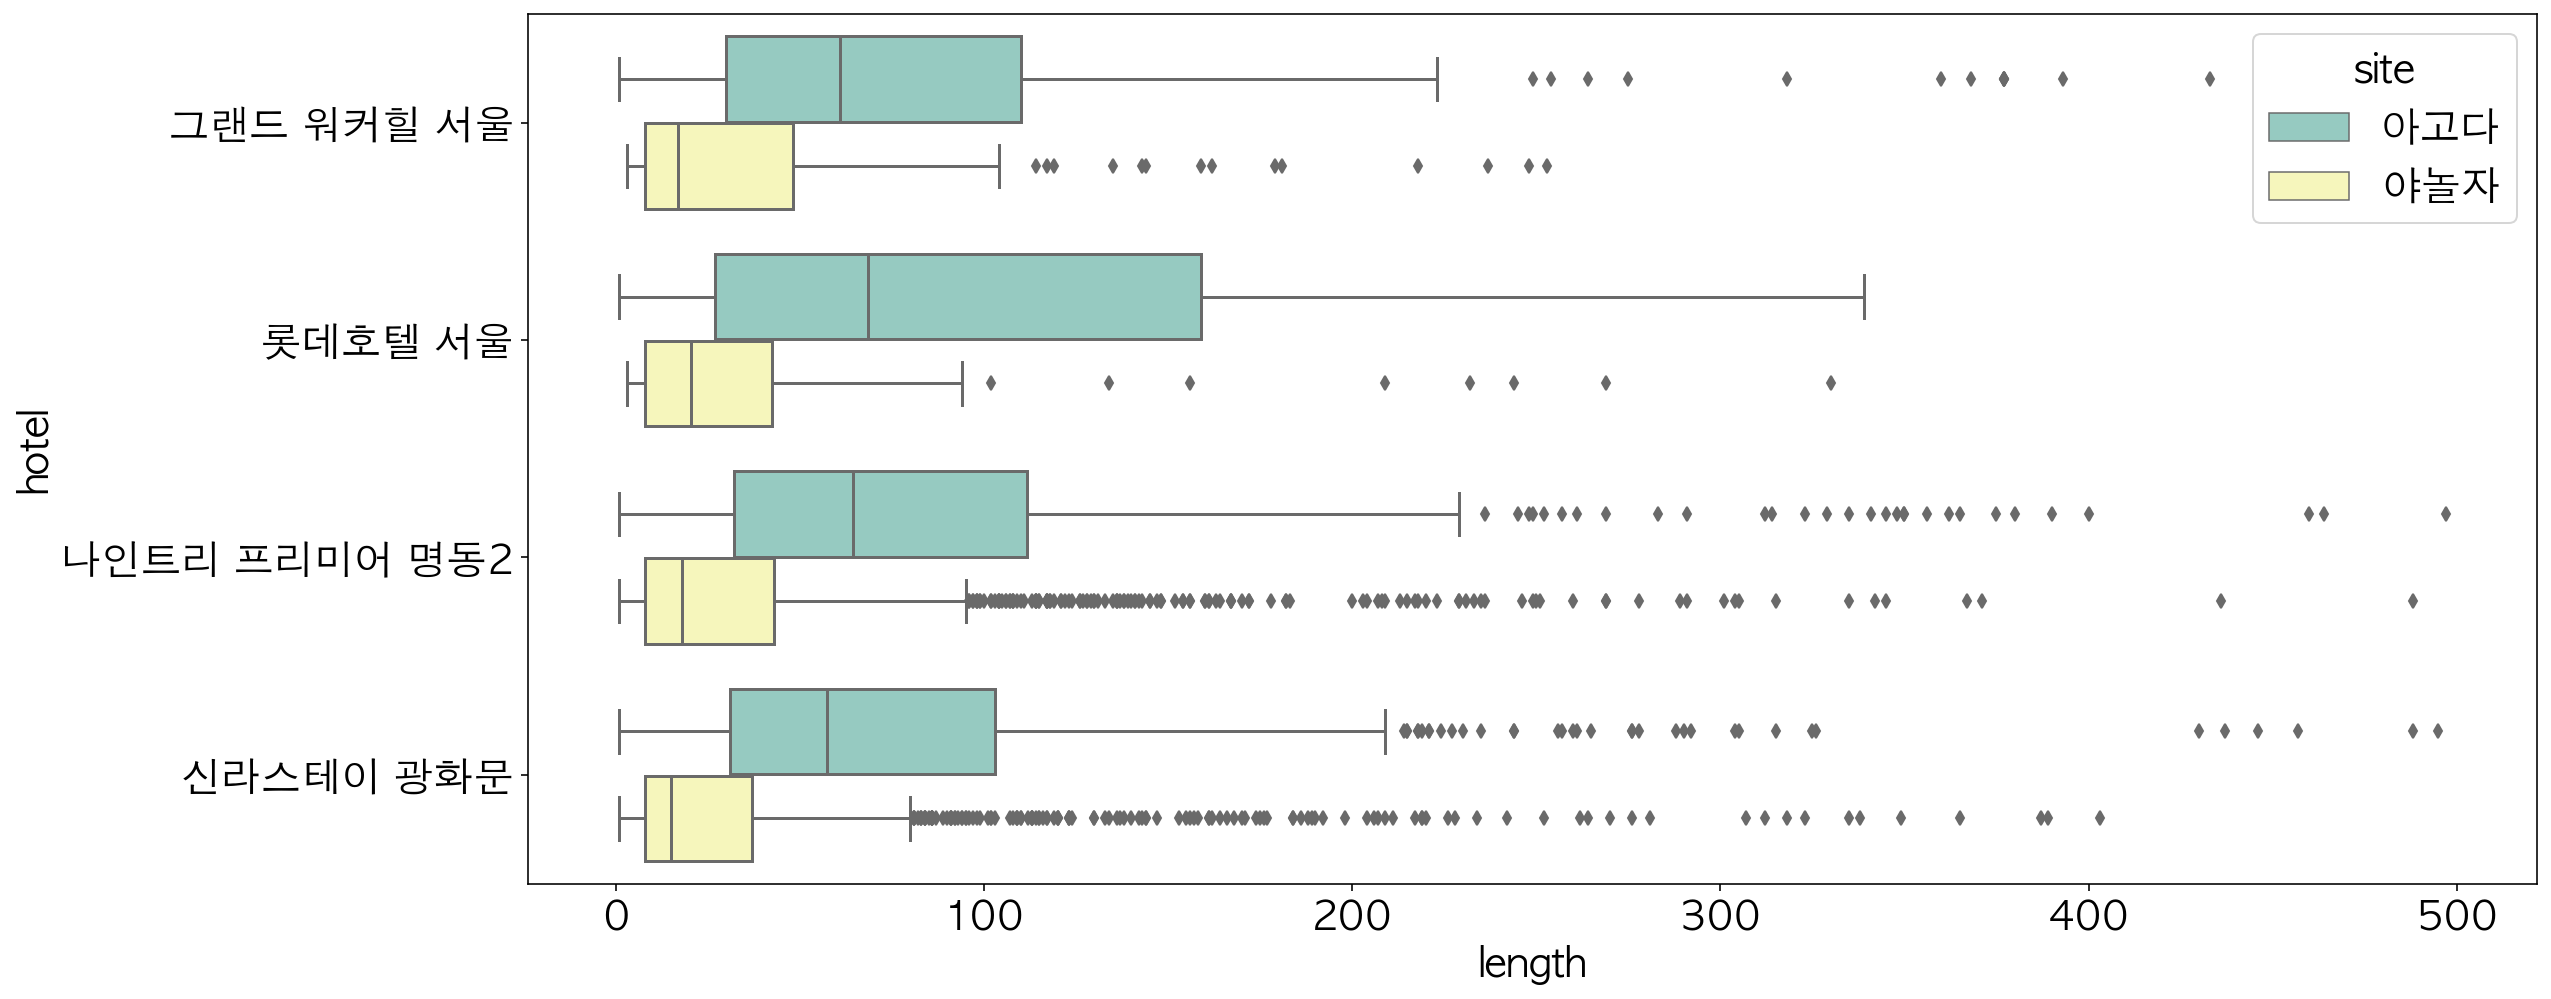

In [54]:
plt.rc('font',family='AppleGothic',size=20)
h1 = (df['hotel'] == '나인트리 프리미어 명동2')
h2 = (df['hotel'] =='신라스테이 광화문')
h3 = (df['hotel'] =='롯데호텔 서울')
h4 = (df['hotel'] =='그랜드 워커힐 서울')
df_h=df[h1 | h2 | h3 | h4]
plt.figure(figsize=(18,8))
sns.boxplot(y="hotel", x="length", hue="site",
                 data=df_h, palette="Set3", orient="h")

In [57]:
df.groupby(['site'])['length'].describe()

,count,mean,std,min,25%,50%,75%,max
site,,,,,,,,
아고다,1431.0,84.649895,78.880726,1.0,30.5,62.0,114.0,497.0
야놀자,2942.0,36.098232,52.259392,1.0,8.0,16.0,40.0,488.0
